# Modeling: BiLSTM-based classifier

In [ ]:
import torch

from torch.utils.data import DataLoader

from networks.utils.loader import save_model_state
from networks.train.train_model import train_model
from networks.dataset.news_dataset import NewsDataset
from networks.model.lstm_classifier import FakeNewsLstmClassifier

%load_ext autoreload
%autoreload 2

In [ ]:
embedding_matrix = torch.load("../registry/embeddings/embedding_matrix.pt")

In [3]:
use_gpu = True
DEVICE = "cuda" if use_gpu else "cpu"
DEVICE

'cuda'

In [4]:
data = torch.load("../registry/datasets/processed_dataset.pt")
X_title = data["X_title"]
X_text = data["X_text"]
y = data["y"]

In [5]:
train_size = int(len(X_title) * 0.7)

X_train_title = X_title[:train_size]
X_val_title = X_title[train_size:]

X_train_text = X_text[:train_size]
X_val_text = X_text[train_size:]

y_train = y[:train_size]
y_val = y[train_size:]

In [6]:
y_train.shape

torch.Size([27047])

In [7]:
model = FakeNewsLstmClassifier(embedding_matrix, hidden_size=128)
title_batch = X_title[:32]
text_batch = X_text[:32]

output = model(title_batch, text_batch)
print(output.shape)

torch.Size([32])


In [8]:
train_dataset = NewsDataset(X_train_title, X_train_text, y_train)
val_dataset = NewsDataset(X_val_title, X_val_text, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

Using device: cuda


Training: 100%|██████████ [Elapsed: 01:12 | Remaining: 00:00]



|Epoch 1/10| Train Loss: 0.0559; Val Loss: 0.0308; Val F1: 0.9882


Training: 100%|██████████ [Elapsed: 01:12 | Remaining: 00:00]



|Epoch 2/10| Train Loss: 0.0098; Val Loss: 0.0281; Val F1: 0.9880
EarlyStopping patience: 1/3


Training: 100%|██████████ [Elapsed: 01:12 | Remaining: 00:00]



|Epoch 3/10| Train Loss: 0.0021; Val Loss: 0.0261; Val F1: 0.9910


Training: 100%|██████████ [Elapsed: 01:15 | Remaining: 00:00]



|Epoch 4/10| Train Loss: 0.0003; Val Loss: 0.0237; Val F1: 0.9940


Training: 100%|██████████ [Elapsed: 01:12 | Remaining: 00:00]



|Epoch 5/10| Train Loss: 0.0001; Val Loss: 0.0288; Val F1: 0.9914
EarlyStopping patience: 1/3


Training: 100%|██████████ [Elapsed: 01:12 | Remaining: 00:00]



|Epoch 6/10| Train Loss: 0.0000; Val Loss: 0.0248; Val F1: 0.9929
EarlyStopping patience: 2/3


Training: 100%|██████████ [Elapsed: 01:12 | Remaining: 00:00]



|Epoch 7/10| Train Loss: 0.0000; Val Loss: 0.0275; Val F1: 0.9926
EarlyStopping patience: 3/3
Early stopping triggered at epoch 7

Best Val F1: 0.9940


          Model Evaluation Metrics           
┏━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Train Value ┃ Validation Value ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ f1_score │      1.0000 │           0.9926 │
│ roc_auc  │      1.0000 │           0.9997 │
└──────────┴─────────────┴──────────────────┘

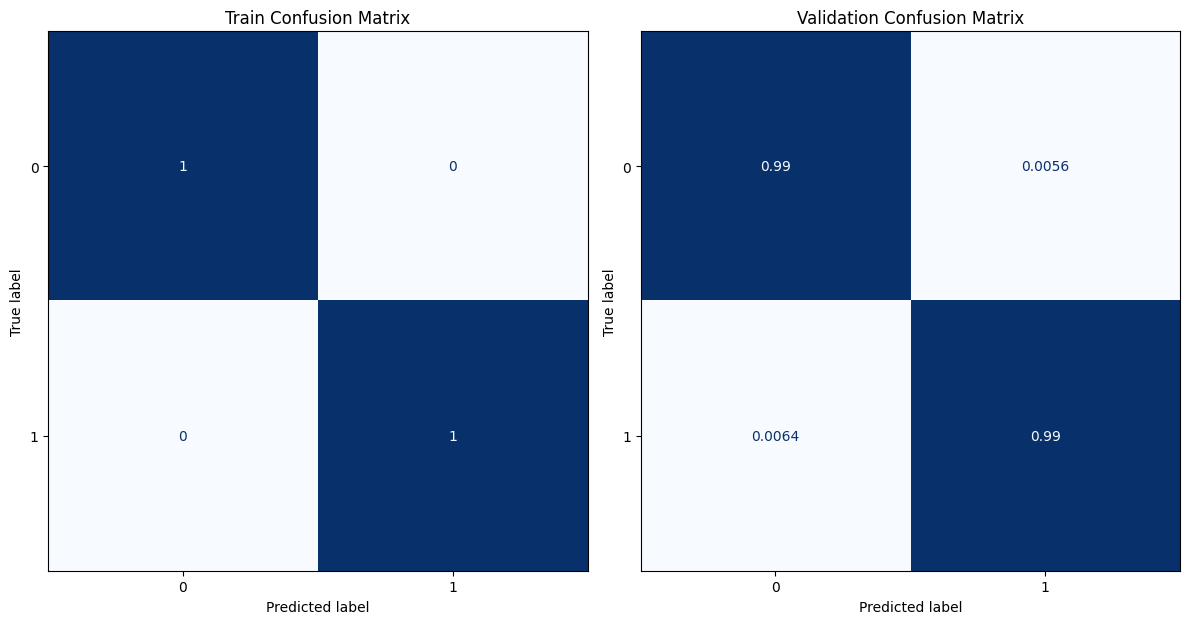

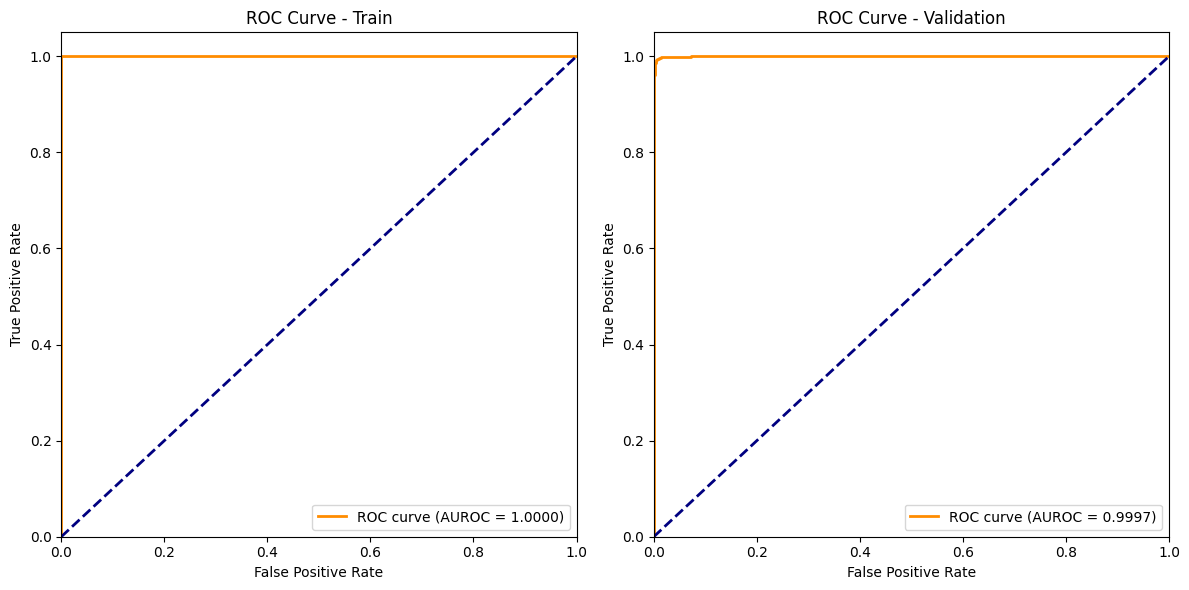

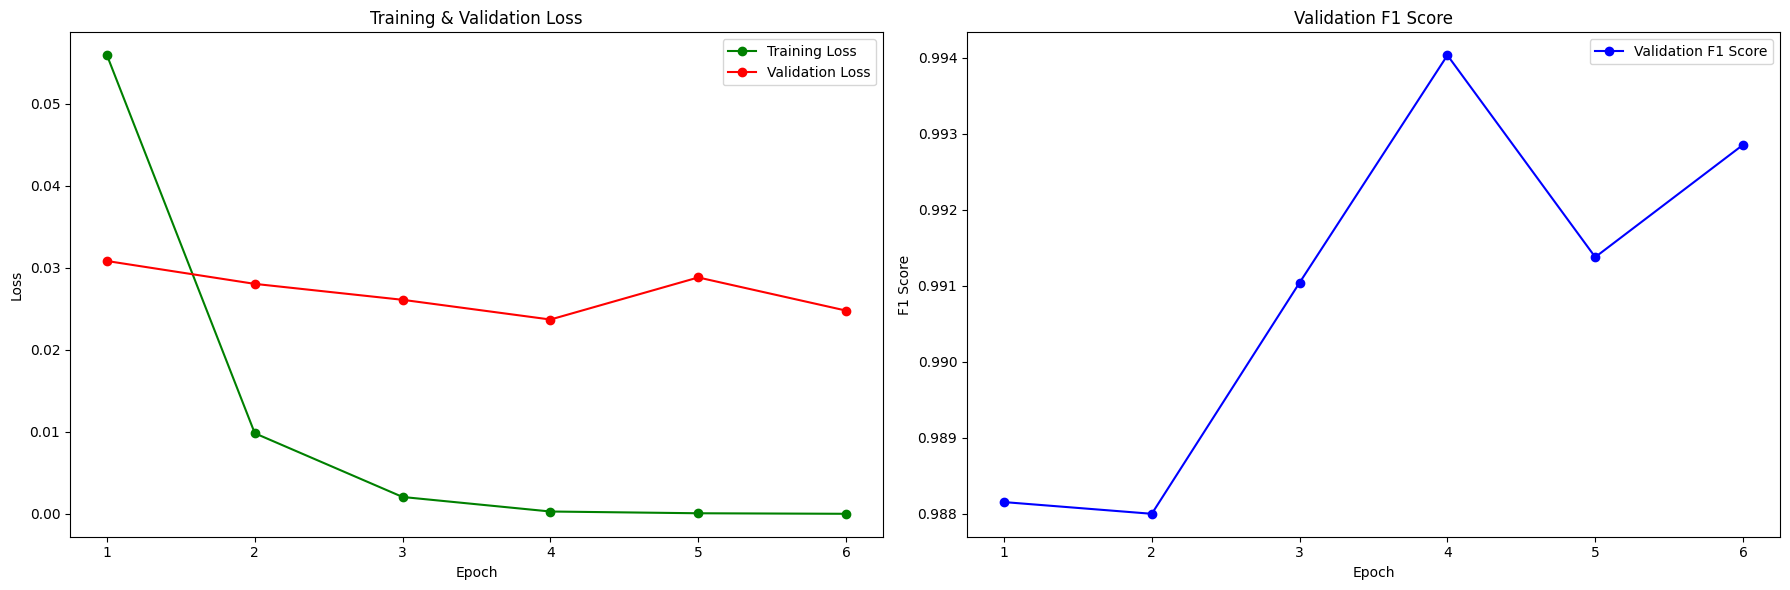

(FakeNewsLstmClassifier(
   (embedding): Embedding(50000, 300, padding_idx=0)
   (title_encoder): LSTM(300, 128, batch_first=True, bidirectional=True)
   (text_encoder): LSTM(300, 128, batch_first=True, bidirectional=True)
   (dropout): Dropout(p=0.3, inplace=False)
   (fc): Linear(in_features=512, out_features=1, bias=True)
 ),
 {'train_loss': [0.05593497525371092,
   0.00984513472522434,
   0.002074939552481677,
   0.000303458093094821,
   8.932886105674471e-05,
   2.4587984485207305e-05],
  'val_loss': [0.030847707064661965,
   0.028058844105881255,
   0.026116767832688258,
   0.023712070174865207,
   0.02884326563109185,
   0.024801233702027803],
  'val_f1': [0.9881549461103404,
   0.988000857081637,
   0.9910409556313993,
   0.9940311234278405,
   0.9913765570105397,
   0.9928533333333334]})

In [9]:
train_model(model, train_loader, val_loader, num_epochs=10, device=DEVICE)

In [10]:
save_model_state(model, path="../registry/models/lstm/fake_news_model.pt")

Model state_dict saved to: C:\Users\altsh\PycharmProjects\fake_news_detection_assignment\registry\models\lstm\fake_news_model.pt


Висновки:

На основі архітектури з двонаправленими LSTM-енкодерами було побудовано модель, що окремо обробляє заголовок і текст новини. Кожне з джерел проходить через власну гілку, після чого об’єднуються.

Модель продемонструвала відмінну якість класифікації:

- Значення F1 на валідації досягло 0.994, а ROC-AUC — 0.9997, що свідчить про майже ідеальну здатність моделі розрізняти класи.

- Матриця помилок підтверджує дуже низький рівень хибних визначень.

- Значення на тренувальній вибірці — 100% точність — свідчать про високу здатність моделі до навчання, хоча й натякають на потенційне перенавчання, яке було обмежене завдяки механізму EarlyStopping, що спрацював на 7-й епосі.

Використання BiLSTM дозволило захопити контекст як у прямому, так і в зворотному напрямках, що, ймовірно, стало ключовим фактором покращення якості порівняно з попередньою GRU-версією.

*Але маємо пам'ятати про наявний недолік набору даних, та підозру на data-leak.